In [1]:
import sys
import xarray as xr
import numpy as np
import os
import yaml
from random import randint
import math
from datetime import datetime, timedelta
from glob import glob
from os import path
import zarr

In [2]:
# ds=xr.load_dataset('/home/jvalenti/projects/rrg-allen/jvalenti/alpha_05.nc',decode_times=False)

In [3]:
ds = xr.load_dataset('/home/jvalenti/projects/rrg-allen/jvalenti/alpha120190101.nc',decode_times=False)

In [4]:
ds2 = xr.load_dataset('/home/jvalenti/projects/rrg-allen/jvalenti/alpha020190101.nc',decode_times=False)

In [5]:
DS =ds.to_dataframe()
DS = DS[DS.status==1]
DS.z = DS.z*DS.fact
DS = DS[DS.z<15]

In [6]:
DS2 =ds2.to_dataframe()
DS2 = DS2[DS2.status==1]
DS2.z = DS2.z*DS2.fact
DS2 = DS2[DS2.z<15]
#DS = DS[DS.time>ds.time[0,50].values]

In [7]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

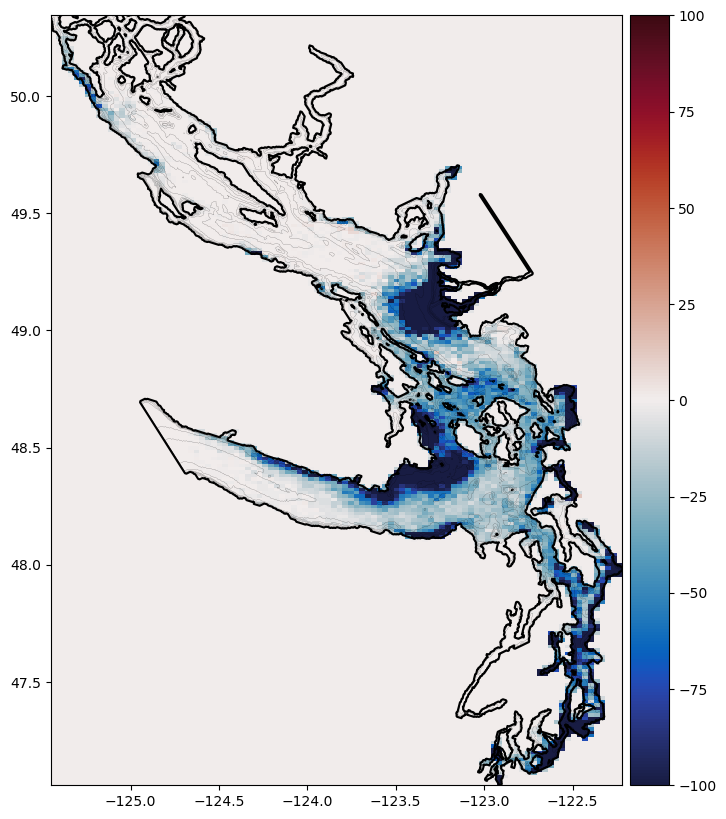

In [8]:
import matplotlib.pyplot as plt
import cmocean as cmocean
from matplotlib import colors

cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))
h, xedges, yedges, image = plt.hist2d(DS.lon,DS.lat,bins=(100, 225), norm=colors.LogNorm())

h1, xedges1, yedges1, image1 = plt.hist2d(DS2.lon,DS2.lat, bins=(xedges, yedges), norm=colors.LogNorm())
ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
aa = plt.pcolormesh(xedges, yedges, (h-h1).T,cmap=cmocean.cm.balance,vmin=-100,vmax=100)
cb2=fig.colorbar(aa,ax=ax,pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
ax.set_aspect(1/np.sin(np.deg2rad(49)))

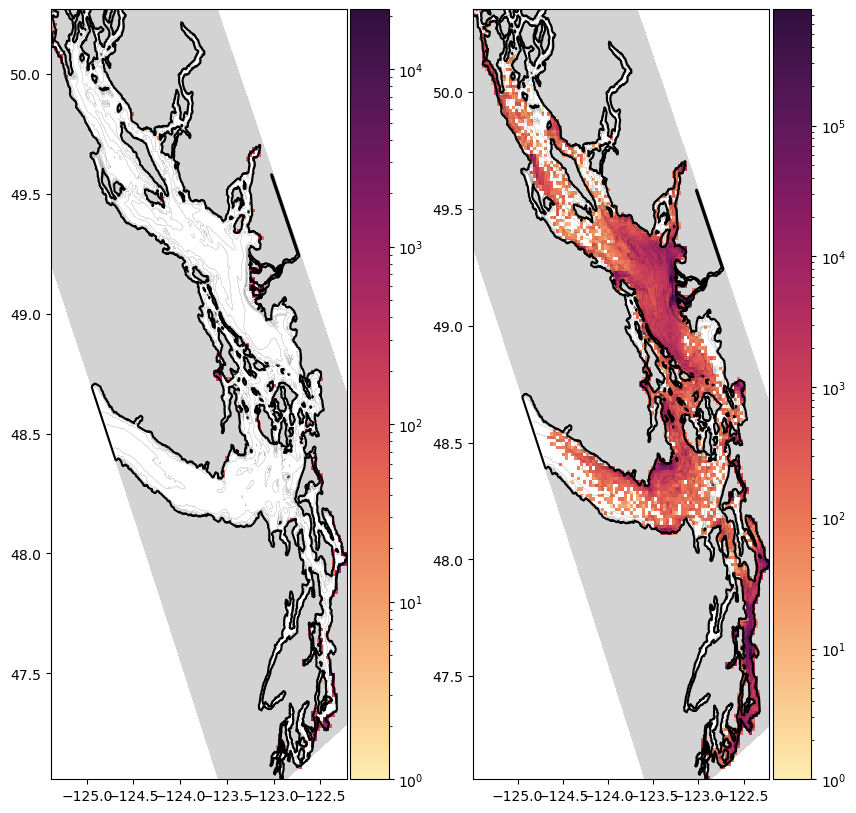

In [9]:
DS =ds.to_dataframe()
DS2 = DS[DS.status==3]
DS = DS[DS.status==2]


fig, ax = plt.subplots(1,2,figsize=(10, 10))
ax[0].contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax[0].contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax[0].contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
aa=ax[0].hist2d(DS.lon,DS.lat,bins=(100, 224),norm = colors.LogNorm(),cmap=cmocean.cm.matter)
cb2=fig.colorbar(aa[3],ax=ax[0],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15

ax[1].contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax[1].contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax[1].contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
aa=ax[1].hist2d(DS2.lon,DS2.lat,bins=(100, 224),norm = colors.LogNorm(),cmap=cmocean.cm.matter)
cb2=fig.colorbar(aa[3],ax=ax[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15

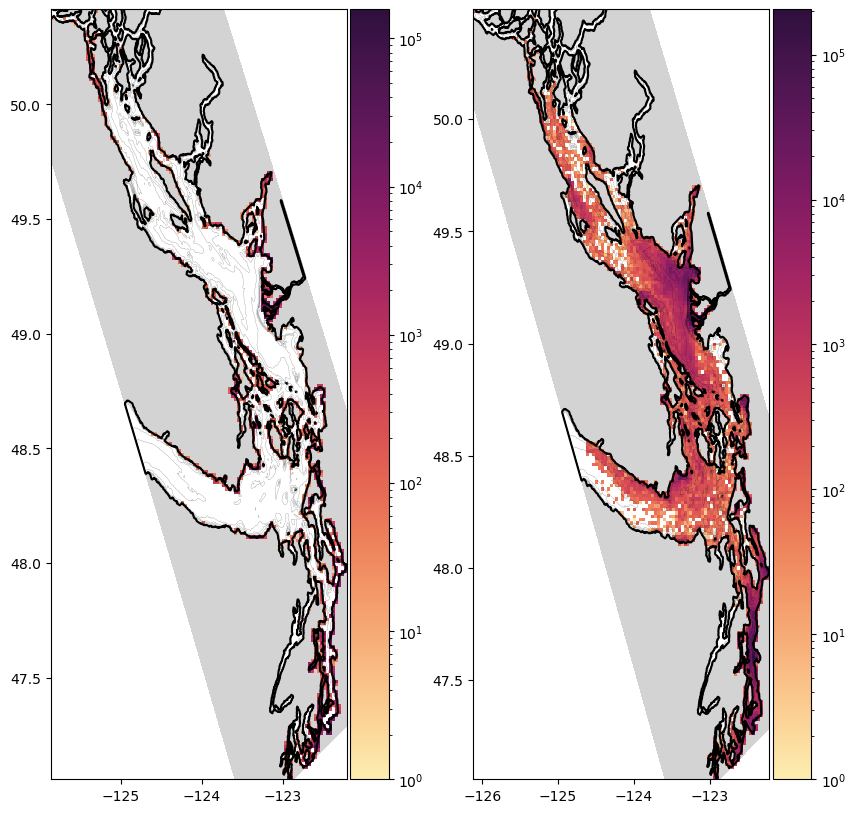

In [10]:
DS =ds2.to_dataframe()
DS2 = DS[DS.status==3]
DS = DS[DS.status==2]


fig, ax = plt.subplots(1,2,figsize=(10, 10))
ax[0].contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax[0].contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax[0].contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
aa=ax[0].hist2d(DS.lon,DS.lat,bins=(100, 224),norm = colors.LogNorm(),cmap=cmocean.cm.matter)
cb2=fig.colorbar(aa[3],ax=ax[0],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15

ax[1].contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax[1].contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax[1].contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
aa=ax[1].hist2d(DS2.lon,DS2.lat,bins=(100, 224),norm = colors.LogNorm(),cmap=cmocean.cm.matter)
cb2=fig.colorbar(aa[3],ax=ax[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15